# Importing Libraries

First we import the libraries necessary to analyze the data

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils as m

Then we load the csv data into pandas dataframe

In [120]:
incidents = pd.read_csv("../data/incidents.csv", low_memory=False)
poverty = pd.read_csv("../data/povertyByStateYear.csv", low_memory=False)
districts = pd.read_csv("../data/year_state_district_house.csv", low_memory=False)
population = pd.read_csv("../data/Population by Age and Sex - US, States, Counties.csv", low_memory=False)

# Incidents Data

Let's take a look at the incidents data

In [121]:
incidents.info()

num_duplicates = incidents.duplicated(
    subset=['longitude', 'latitude', 'date', 'state', 'city_or_county', 'n_participants']).sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")

num_duplicates = poverty.duplicated().sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")

num_duplicates = districts.duplicated().sum()
print(f"Number of duplicates in the DataFrame: {num_duplicates}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

Visualize how many null values are in the dataset

<Axes: >

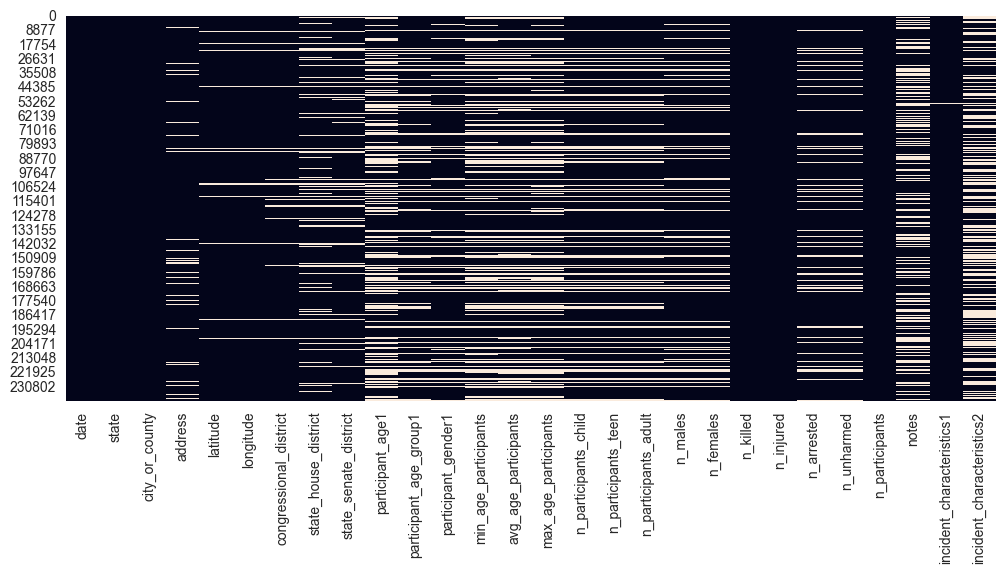

In [122]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(incidents.isnull(), cbar=False, xticklabels=True, ax=ax)


#Features information

"Type" indicates the wanted feature Datatype for conversion, most of the columns are defaulted to object type and need casting.

- **date**
    - **Type:** Datetime
    - **Description:** Date of the incident.

- **state**
    - **Type:** String
    - **Description:** State where the incident occurred.
        
- **city_or_county**
    - **Type:** String
    - **Description:** City or county where the incident occurred.

- **address**
    - **Type:** String
    - **Description:** Address related to the incident (if available).

- **latitude / longitude**
    - **Type:** Float64
    - **Description:** Geographical coordinates of the incident location.

- **congressional_district / state_house_district / state_senate_district**
    - **Type:** Float64
    - **Description:** Political district information related to the incident location.
 
- **participant_age1 / participant_age_group1 / participant_gender1**
    - **Type:** Float64 and String
    - **Description:** Information about the age, age groups, and gender of a random participant of the incident.

- **min_age_participants / avg_age_participants / max_age_participants**
    - **Type:** Int64
    - **Description:** Minimum, average, and maximum ages of the participants.

- **n_participants_child / n_participants_teen / n_participants_adult**
    - **Type:** Int64
    - **Description:** Count of participants categorized into child, teen, and adult groups.

- **n_males / n_females**
    - **Type:** Float64
    - **Description:** Counts of males / females involved in the incident.

- **n_killed**
    - **Type:** Int64
    - **Description:** Counts of individuals killed in the incident.

- **n_injured**
    - **Type:** Int64
    - **Description:** Counts of individuals injured in the incident.

- **n_unharmed**
    - **Type:** Float64
    - **Description:** Counts of participants not harmed in the incident.
 
- **n_arrested**
    - **Type:** Float64
    - **Description:** Counts of individuals arrested in the incident.

- **n_participants**
    - **Type:** Float64
    - **Description:** Total count of participants involved in the incident.

- **notes**
    - **Type:** String
    - **Description:** Additional notes or details related to the incident.

- **incident_characteristics1 / incident_characteristics2**
    - **Type:** String
    - **Description:** Characteristics or features of the incident.



# Data Casting

Most of the columns are defaulted to object type and need casting to Int64, handling strings and null values present.


In [123]:
#Converts date to datetime
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')

#Converts age columns to numeric, since Strings are present, then to int
age_columns = ['participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants']
incidents[age_columns] = incidents[age_columns].apply(pd.to_numeric, errors='coerce')

age_groups = ['n_participants_child', 'n_participants_teen', 'n_participants_adult']
incidents[age_groups] = incidents[age_groups].apply(pd.to_numeric, errors='coerce')
incidents[age_groups] = incidents[age_groups].astype('Int64')

#Converts to Int64
participant_columns = ['n_participants', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed']
incidents[participant_columns] = incidents[participant_columns].astype('Int64')
for column in participant_columns:
    incidents[column] = incidents[column].apply(m.to_int)

# Standardize to lowercase the characteristics columns
incident_characteristics_columns = ['incident_characteristics1', 'incident_characteristics2']
incidents[incident_characteristics_columns] = incidents[incident_characteristics_columns].astype('string')
for column in incident_characteristics_columns:
    incidents[column] = incidents[column].str.lower()

# removing special characters from notes

incidents['notes'] = incidents['notes'].str.lower().replace(r'[^\w\s]', '')

# write year and month to the dataframe from date
incidents['year'] = incidents['date'].dt.year
incidents['month'] = incidents['date'].dt.month
incidents['day'] = incidents['date'].dt.day


In [124]:
incidents.describe()


,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,...,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_participants,year,month,day
count,239677,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,1.591260e+05,1.591680e+05,1.590840e+05,...,197571.0,197572.0,203315.000000,203315.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,5.674359e+06,2.446181e+04,1.871406e+04,...,8.46191,18.516014,1.520252,0.212340,0.252290,0.494007,1.636895,2017.151879,6.352504,15.779628
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,-1.000000e+03,-1.000000e+03,-1.000000e+03,...,-947.0,-991.0,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2015-07-11 00:00:00,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.900000e+01,2.100000e+01,2.100000e+01,...,0.0,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,3.000000,8.000000
50%,2016-08-25 00:00:00,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,2.500000e+01,2.700000e+01,2.800000e+01,...,0.0,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,6.000000,16.000000
75%,2017-08-09 00:00:00,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,3.500000e+01,3.700000e+01,4.000000e+01,...,0.0,2.0,2.000000,0.000000,0.000000,1.000000,2.000000,2017.000000,9.000000,23.000000
max,2030-11-28 00:00:00,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,9.000000e+11,8.719163e+08,8.300000e+06,...,762487.0,827900.0,61.000000,23.000000,50.000000,53.000000,103.000000,2030.000000,12.000000,31.000000
std,NaN,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,2.256171e+09,2.199489e+06,1.071527e+05,...,2223.925791,3232.716199,0.996767,0.490888,0.521779,0.729952,1.252514,4.145756,3.448189,8.826932


# Handling wrong values

As we can see from describe, there are some clearly wrong values that would act as outliers and harm the distribution plots.
For the moment, we limit to setting them to pd.NA so pandas can ignore them while computing distributions.

In [125]:
# Ages must be non-negative and not unrealistic
for column in age_columns:
    incidents[column] = incidents[column].apply(m.clean_age)

# The number of people in an age group can't be negative, nor higher than the total    
for column in age_groups:
    incidents[column] = incidents[column].apply(m.non_negative_int)

sum_age_groups = incidents[age_groups].sum(axis=1)
mask = sum_age_groups > incidents['n_participants']

# Replace exceeding values in 'age_groups' columns with pd.NA
incidents.loc[mask, age_groups] = pd.NA

incidents.info()
incidents.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       239677 non-null  datetime64[ns]
 1   state                      239677 non-null  object        
 2   city_or_county             239677 non-null  object        
 3   address                    223180 non-null  object        
 4   latitude                   231754 non-null  float64       
 5   longitude                  231754 non-null  float64       
 6   congressional_district     227733 non-null  float64       
 7   state_house_district       200905 non-null  float64       
 8   state_senate_district      207342 non-null  float64       
 9   participant_age1           147377 non-null  object        
 10  participant_age_group1     197558 non-null  object        
 11  participant_gender1        203315 non-null  object  

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,n_males,n_females,n_killed,n_injured,n_participants,year,month,day
count,239677,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,203315.000000,203315.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.338348,8.001265,55.447132,20.47711,1.520252,0.212340,0.252290,0.494007,1.636895,2017.151879,6.352504,15.779628
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2015-07-11 00:00:00,33.903400,-94.158725,2.000000,21.000000,9.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,3.000000,8.000000
50%,2016-08-25 00:00:00,38.570600,-86.249600,5.000000,47.000000,19.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,6.000000,16.000000
75%,2017-08-09 00:00:00,41.437375,-80.048625,10.000000,84.000000,30.00000,2.000000,0.000000,0.000000,1.000000,2.000000,2017.000000,9.000000,23.000000
max,2030-11-28 00:00:00,71.336800,97.433100,53.000000,901.000000,94.00000,61.000000,23.000000,50.000000,53.000000,103.000000,2030.000000,12.000000,31.000000
std,NaN,5.130763,14.359546,8.480835,42.048117,14.20456,0.996767,0.490888,0.521779,0.729952,1.252514,4.145756,3.448189,8.826932


# TODO Missing values

Due to the presence of null values in the dataset, we need to handle them in order to avoid problems during the analysis.
For n_arrested and n_unharmed we can assume that the null values are 0.

In [126]:
incidents['n_arrested'] = incidents['n_arrested'].fillna(0).astype('Int64')
incidents['n_unharmed'] = incidents['n_unharmed'].fillna(0).astype('Int64')

incidents.describe()


,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day
count,239677,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,203315.000000,203315.000000,239677.000000,239677.000000,239677.0,239677.0,239677.000000,239677.000000,239677.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.338348,8.001265,55.447132,20.47711,1.520252,0.212340,0.252290,0.494007,0.414445,0.437209,1.636895,2017.151879,6.352504,15.779628
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2013.000000,1.000000,1.000000
25%,2015-07-11 00:00:00,33.903400,-94.158725,2.000000,21.000000,9.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2015.000000,3.000000,8.000000
50%,2016-08-25 00:00:00,38.570600,-86.249600,5.000000,47.000000,19.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2016.000000,6.000000,16.000000
75%,2017-08-09 00:00:00,41.437375,-80.048625,10.000000,84.000000,30.00000,2.000000,0.000000,0.000000,1.000000,1.0,1.0,2.000000,2017.000000,9.000000,23.000000
max,2030-11-28 00:00:00,71.336800,97.433100,53.000000,901.000000,94.00000,61.000000,23.000000,50.000000,53.000000,63.0,20.0,103.000000,2030.000000,12.000000,31.000000
std,NaN,5.130763,14.359546,8.480835,42.048117,14.20456,0.996767,0.490888,0.521779,0.729952,0.814345,0.884778,1.252514,4.145756,3.448189,8.826932


# Attributes exploration and outliers fixing
We now explore the distributions in order to find the outliers of each attribute.


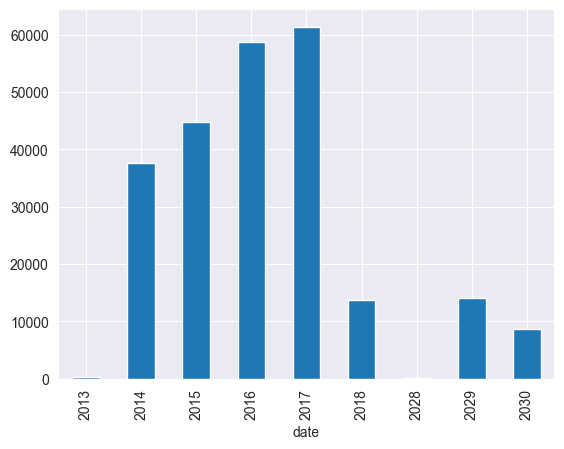

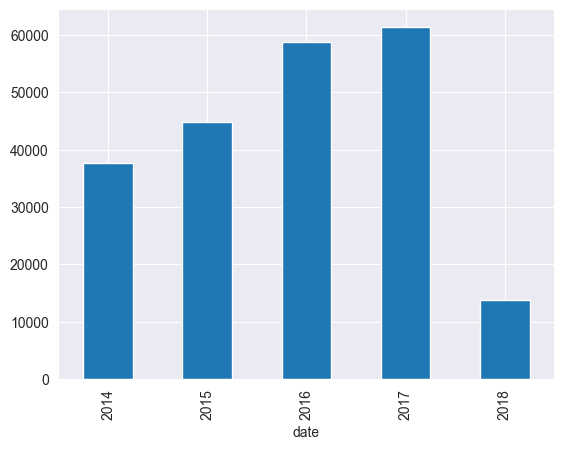

In [127]:

# Checking the years
incidents.date.groupby(incidents.date.dt.year).count().plot(kind='bar')
plt.show()

# We should exclude 2028 to 2030 as they are in the future, 2013 have too little data
incidents = incidents[(incidents.year <= 2018) & (incidents.year > 2013)]

incidents.date.groupby(incidents.date.dt.year).count().plot(kind='bar')
plt.show()


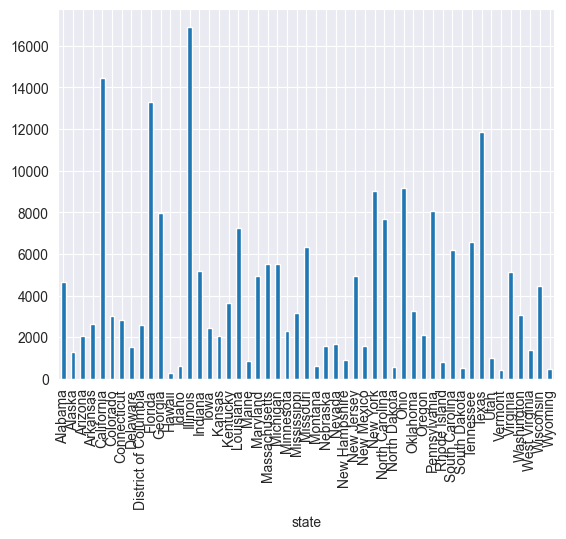

In [128]:
# Checking the state distribution
incidents.state.groupby(incidents.state).count().plot(kind='bar')
plt.show()

<Figure size 1000x1000 with 0 Axes>

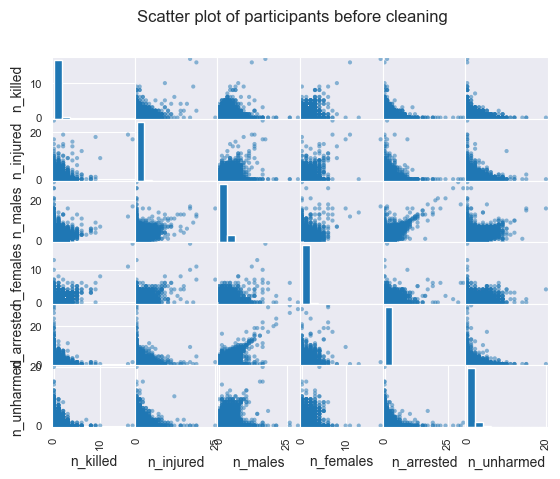

<Figure size 1000x1000 with 0 Axes>

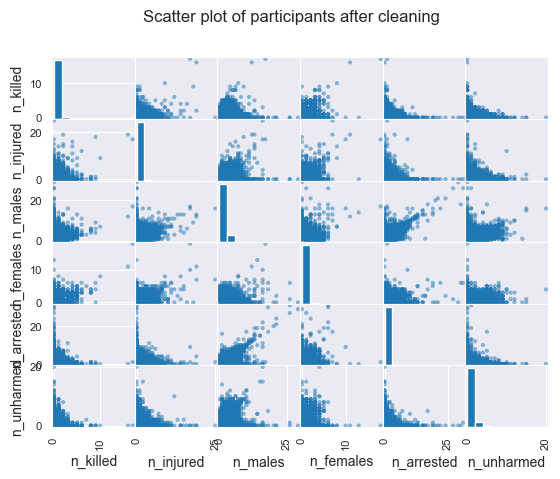

In [137]:

# Select columns for scatter matrix
scatter_cols = ['n_killed', 'n_injured', 'n_males', 'n_females', 'n_arrested', 'n_unharmed']

pd.plotting.scatter_matrix(incidents[scatter_cols])
plt.suptitle('Scatter plot of participants before cleaning')
plt.show()

# we remove the outliers that are too far from the mean
incidents = incidents[incidents['n_killed'] < 25]
incidents = incidents[incidents['n_participants'] < 50]

pd.plotting.scatter_matrix(incidents[scatter_cols])
plt.suptitle('Scatter plot of participants after cleaning')
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 180045 entries, 0 to 239676
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       180045 non-null  datetime64[ns]
 1   state                      180045 non-null  object        
 2   city_or_county             180045 non-null  object        
 3   address                    167419 non-null  object        
 4   latitude                   172900 non-null  float64       
 5   longitude                  172900 non-null  float64       
 6   congressional_district     169841 non-null  float64       
 7   state_house_district       151050 non-null  float64       
 8   state_senate_district      156121 non-null  float64       
 9   participant_age1           145807 non-null  object        
 10  participant_age_group1     169574 non-null  object        
 11  participant_gender1        180045 non-null  object       

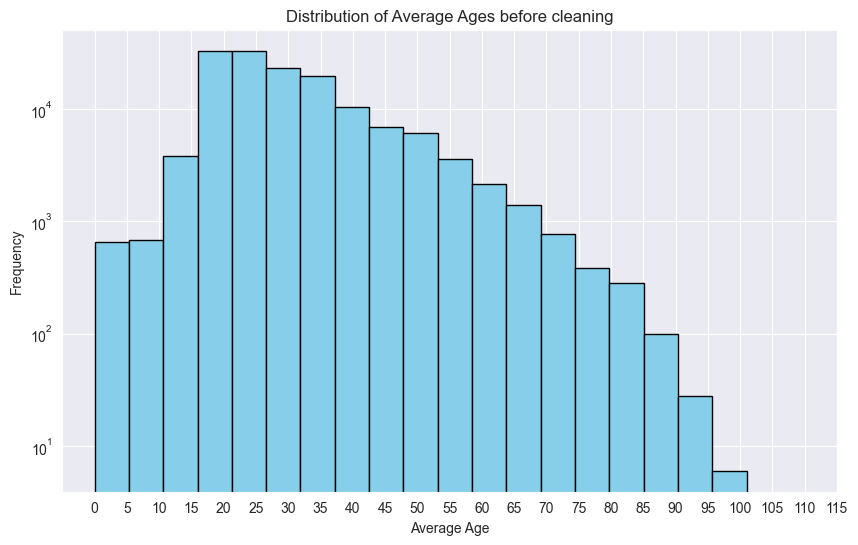

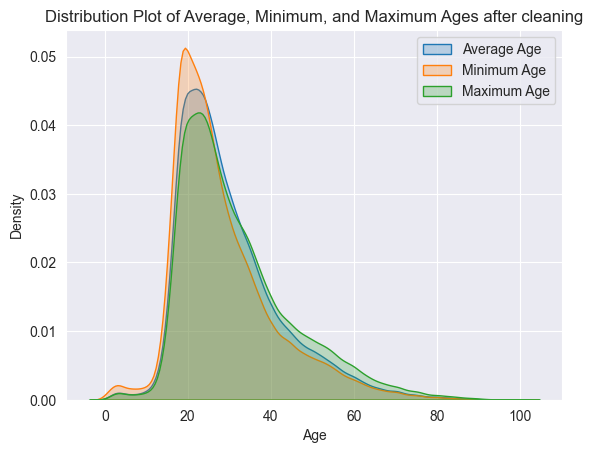

<class 'pandas.core.frame.DataFrame'>
Index: 145807 entries, 0 to 239675
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       145807 non-null  datetime64[ns]
 1   state                      145807 non-null  object        
 2   city_or_county             145807 non-null  object        
 3   address                    135178 non-null  object        
 4   latitude                   139806 non-null  float64       
 5   longitude                  139806 non-null  float64       
 6   congressional_district     137534 non-null  float64       
 7   state_house_district       122243 non-null  float64       
 8   state_senate_district      126117 non-null  float64       
 9   participant_age1           145807 non-null  object        
 10  participant_age_group1     145755 non-null  object        
 11  participant_gender1        145807 non-null  object       

In [130]:
incidents.info()

backup_incidents = incidents.copy()

incidents = incidents.dropna(subset=age_columns)

plt.hist(incidents['avg_age_participants'], bins=m.sturges_bins(incidents, 'avg_age_participants'), color='skyblue',
         edgecolor='black')
plt.yscale('log')
plt.xticks(range(0, 120, 5))
plt.title('Distribution of Average Ages before cleaning')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()

incidents = incidents[(incidents.avg_age_participants >= incidents.min_age_participants) &
                      (incidents.avg_age_participants <= incidents.max_age_participants)]

sns.kdeplot(incidents['avg_age_participants'], fill=True, label='Average Age')
sns.kdeplot(incidents['min_age_participants'], fill=True, label='Minimum Age')
sns.kdeplot(incidents['max_age_participants'], fill=True, label='Maximum Age')

plt.title('Distribution Plot of Average, Minimum, and Maximum Ages after cleaning')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
incidents.info()



In [131]:
incidents = backup_incidents

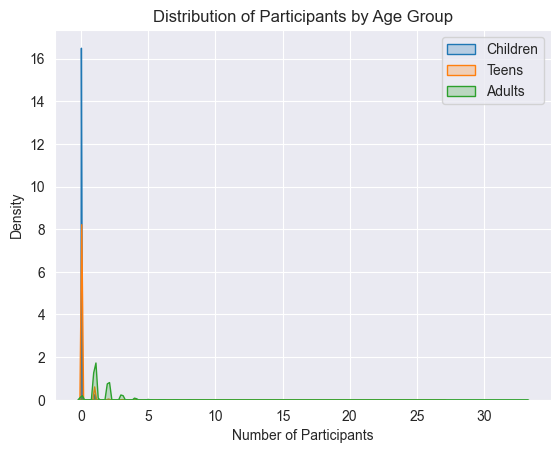

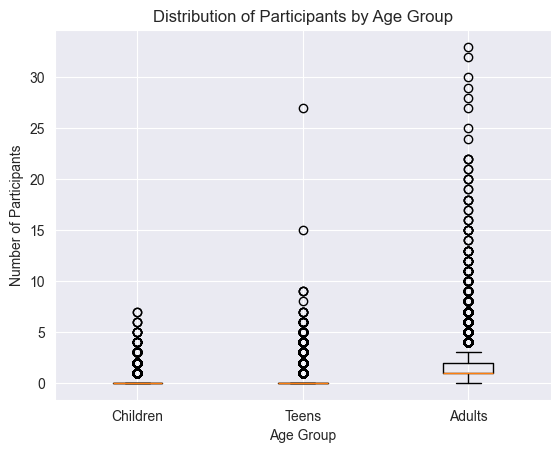

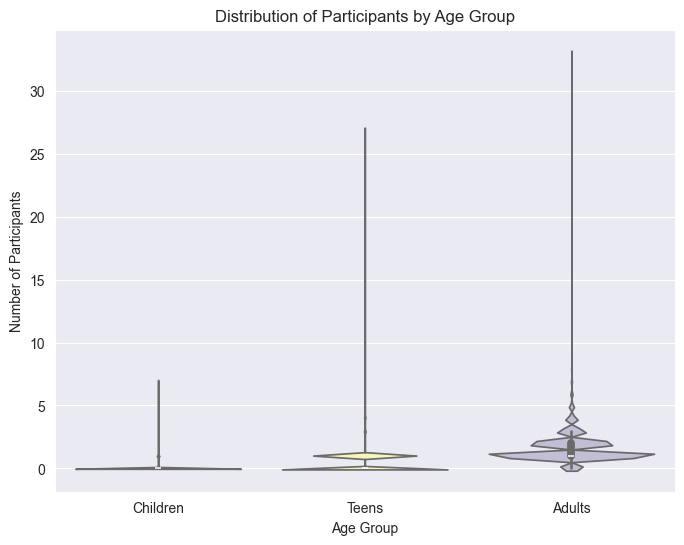

In [132]:
sns.kdeplot(incidents['n_participants_child'], fill=True, label='Children')
sns.kdeplot(incidents['n_participants_teen'], fill=True, label='Teens')
sns.kdeplot(incidents['n_participants_adult'], fill=True, label='Adults')

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Number of Participants')
plt.ylabel('Density')
plt.legend()
plt.show()

#use n_participants as ceiling for the sum of the three age groups
incidents = incidents[(
                                  incidents.n_participants_child + incidents.n_participants_teen + incidents.n_participants_adult) <= incidents.n_participants]

plt.boxplot([incidents['n_participants_child'], incidents['n_participants_teen'], incidents['n_participants_adult']],
            labels=['Children', 'Teens', 'Adults'])

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=[incidents['n_participants_child'], incidents['n_participants_teen'], incidents['n_participants_adult']],
    palette='Set3')

plt.title('Distribution of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(ticks=[0, 1, 2], labels=['Children', 'Teens', 'Adults'])
plt.show()

<Axes: >

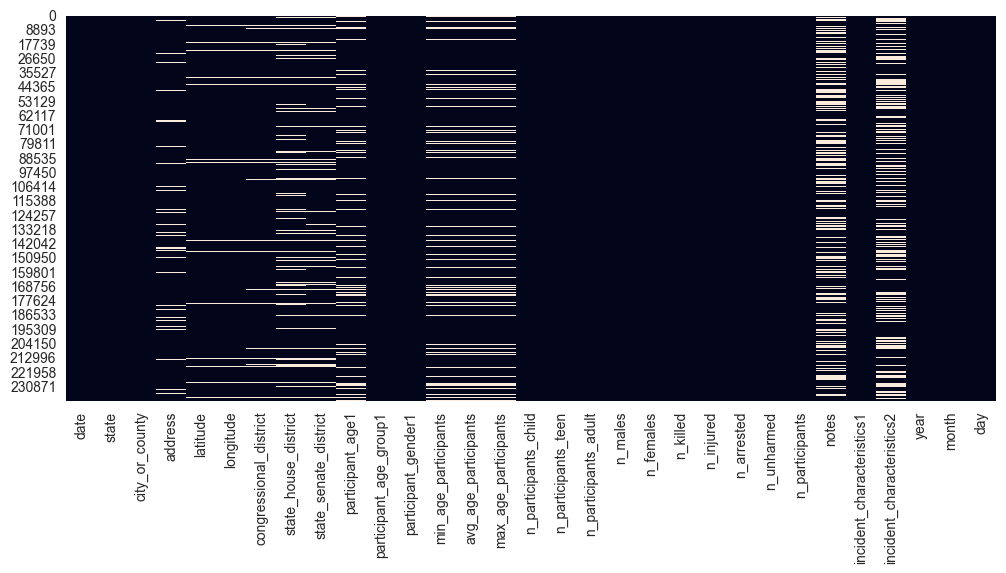

In [133]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(incidents.isnull(), cbar=False, xticklabels=True, ax=ax)
